In [55]:
%load_ext autoreload
%autoreload 2

import os
import glob
from yaml import safe_load as yaml_load

import numpy as np
import tifffile
import matplotlib.pyplot as plt

from stardist import random_label_cmap

from keras_transfer_learning import model

lbl_cmap = random_label_cmap()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Create the model

In [28]:
model_name = 'small-unet_stardist-dsb2018'
model_dir = os.path.join('.', 'models', model_name)

m = model.Model(model_dir=model_dir, load_weights='last')

Load a data example

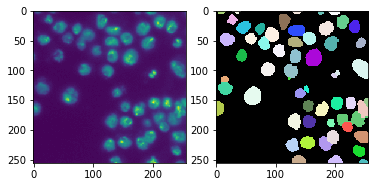

In [71]:
idx = 1 # Change to load another example

data_dir = os.path.join(m.config['data']['data_dir'], 'test')
img_dir = os.path.join(data_dir, 'images')
mask_dir = os.path.join(data_dir, 'masks')

img_file = sorted(glob.glob(os.path.join(img_dir, '*.tif')))[idx]
mask_file = sorted(glob.glob(os.path.join(mask_dir, '*.tif')))[idx]

img = tifffile.imread(img_file)
mask = tifffile.imread(mask_file)

plt.subplot(1, 2, 1)
plt.imshow(img)
plt.subplot(1, 2, 2)
plt.imshow(mask, cmap=lbl_cmap)
plt.show()

Run the model on the example

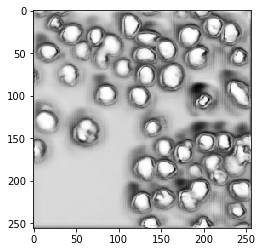

In [63]:
pred = m.predict(img)[0]

# TODO plot for stardist
plt.imshow(pred[...,0], cmap='gray')
plt.show()

Process the output

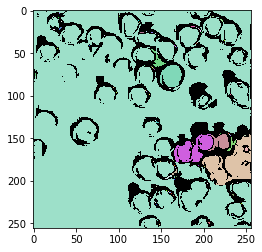

In [70]:
labels = m.process_prediction(pred)[0]

# TODO labels vs segm
plt.imshow(labels, cmap=lbl_cmap)
plt.show()